# Decision Tree Assignment

## Problem Statement:

1. Pokémon is a group of adorable creatures peacefully colonizing a planet until humans come along and make them combat each other in order to get shiny badges and we can call them Pokémon masters.
2. In this universe, there exists a group of rare and often strong Pokémon, known as Legendary Pokémon. Unfortunately, there are no detailed criteria that define these Pokémon.
3. The only way to recognize a Legendary Pokémon is through information from official media, such as the game or anime.
4. This data set includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed. The legend of a pokemon cannot be suspected only by its Attack and Defense. It would be worth finding which variables can define the legend of a pokemon. The strategy is to analyze the data and perform a predictive task of classification to predict the legend of a pokemon using a decision tree algorithm.


In [4]:
# Importing Libraries 

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier

In [5]:
df = pd.read_csv("pokemon.csv")
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


<h3> Q1. How many pokemon are from the 5th generation?
    
    
a. 178
b. 165
c. 150
d. 170

In [7]:
# Q1
df[df.Generation==5].shape[0]



165

Answer is b. 165

<h3> Q2. How many pokemon have the highest defense score?


a. 10
b. 7
c. 3
d. 2

In [8]:
# Q2
df[df.Defense == df.Defense.max()].shape[0]


3

Answer is c. 3

<h3> Q3. How you will be handling missing values in this dataset:

    
a. Fill up the null values with the median.
b. Fill up the null values with standard deviation.
c. Fill up the null values with the mean.
d. Fill up the null values with None.

In [11]:
# Q3

df["Type 2"] = df["Type 2"].fillna("None")



Answer is d. 'None'

<h3> Q4. Which columns are not having any kind of relationship with the generation
column?


a. Attack
b. Speed
c. Both of the above
d. None of the above

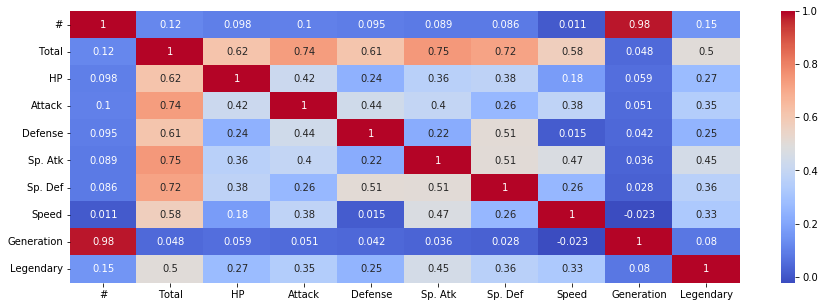

In [8]:
# Q4
plt.figure(figsize = (15,5))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

# Answer is c. Both

<h3> Q5. Which of the following model is the best fit for predicting the legendary of the
pokemon based on the below parameters:
    
    
1. Handle the missing values.
2. Split the dataset into a 70:30 ratio with random_state as 1.

    
a. Linear Regression
b. Logistic Regression
c. Decision Tree Model
d. Random Forest Model

In [83]:
# Q5


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Type 1"]=le.fit_transform(df["Type 1"])
df["Type 2"]=le.fit_transform(df["Type 2"])

X = df.drop(columns = ["#","Name","Total","Legendary"])
y = df.Legendary
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# Fitting decision tree

dt = tree.DecisionTreeClassifier(max_depth = 3, random_state=1)

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
acc = (cm[0,0]+cm[1,1])/len(y_pred)
print("Decision Tree Algo Accuracey is : ",acc)


# fitting logistic regression

X1 = df.drop(columns = ["#","Name","Total","Legendary"])
y2 = df.Legendary
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.3, random_state = 1)

sc = StandardScaler()
X_train1 = sc.fit_transform(X_train1)
X_test1 = sc.transform(X_test1)

lr = LogisticRegression()
lr.fit(X_train1, y_train1)
y_pred1 = lr.predict(X_test1)


cm1 = confusion_matrix(y_test1, y_pred1)
acc1 = (cm1[0,0]+cm1[1,1])/len(y_pred1)
print("Logistic Regression Algo Accuracey is : ",acc1)


# fitting random forest model

rf = RandomForestClassifier(n_estimators=100, random_state = 1)
rf.fit(X_train, y_train)
y_pred2 = rf.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred2)
acc2 = (cm2[0,0]+cm2[1,1])/len(y_pred2)
# acc2 = accuracy_score(y_test, y_pred2)
print("Random Forest Algo Accuracey is : ",acc2)



Decision Tree Algo Accuracey is :  0.925
Logistic Regression Algo Accuracey is :  0.9291666666666667
Random Forest Algo Accuracey is :  0.9375


Based on the accuracy scores, Answer is d. Random Forest

In [84]:
print(cm)
print(cm1)
print(cm2)

[[217   2]
 [ 16   5]]
[[217   2]
 [ 15   6]]
[[218   1]
 [ 14   7]]


In [80]:
c_parameter_name = 'max_depth'
c_parameter_values = [1,2,3,4,5,6,7,8,9,10]
df1 = pd.DataFrame(columns=['max_depth', 'accuracy'])
df1



,max_depth,accuracy


In [81]:
for input_parameter in c_parameter_values:
    model = tree.DecisionTreeClassifier(max_depth=input_parameter, random_state=1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_score = accuracy_score(y_test,y_pred)*100
    df1= df1.append({'max_depth' : input_parameter , 'accuracy' : acc_score}, ignore_index=True) 
df1

,max_depth,accuracy
0,1.0,91.250000
1,2.0,92.916667
2,3.0,92.500000
3,4.0,90.833333
4,5.0,88.750000
5,6.0,90.833333
6,7.0,90.416667
7,8.0,91.250000
8,9.0,90.000000
9,10.0,90.000000


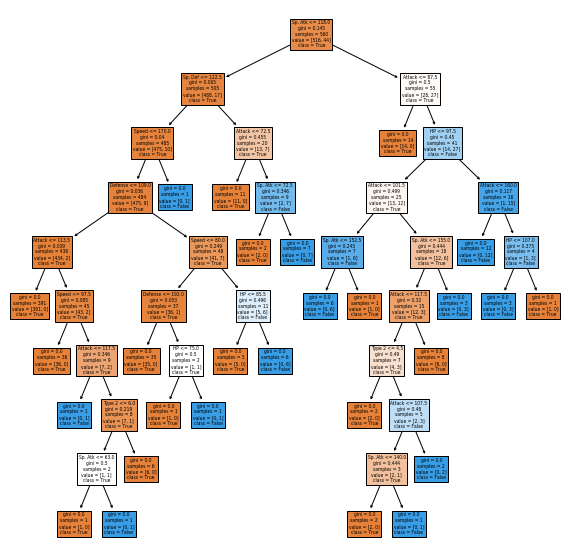

In [134]:
# Plotting Decision Tree

plt.figure(figsize=(10,10))
tree.plot_tree(dt, feature_names = X_test.columns, class_names =["True","False"], filled=True)
plt.show()

<h3> Q6. What is the precision of the Decision Tree model when the target is False?

    
a. 0.90 to 0.1
b. 0.80 to 0.90
c. 1.0 to 2.0
d. 0.50 to 0.60

In [82]:
# Q6

false_precision = cm[1,1]/(cm[0,1]+cm[1,1])
print("Precision with Target False : ", false_precision)



Precision with Target False :  0.7142857142857143


Answer is  0.714

<h3> 7. What is the sensitivity of the above model when the target is True?
    
a. 0.90 to 1.0
b. 0.50 to 0.60
c. 0.60 to 0.70
d. 0.30 to 0.40

In [77]:
# Q7  

sen = cm[0,0]/(cm[0,0]+cm[0,1])
print("Sensivity : ", sen)



Sensivity :  0.9680365296803652


Answer is  0.9 to 1.0

<h3> 8. How much correctly classified data has been retrieved from the above model?

    a. Between 15 to 20 b. Between 7 to 10 c. Between 30 to 45 d. Between 50 to 70

In [3]:
# Q8
# Correctly received data from decision tree model is 91.25% (accuracy)

<h3> 9. Decision tree models might create some biased trees if some classes dominate. From the below options which action is best to take so that it won't create biased trees: 
    
    a. balance the dataset prior to fitting
    b. imbalance the dataset prior to fitting
    c. balance the dataset after fitting
    d. None of the above

In [135]:
# Q9
# Answer is d. None of the above. To address Bias in Decision Tree, 
# ensemble methods like random forest should be used.

<h3> 10.Suppose, you have to work with an ML problem, where you have to predict the number of oxygen tanks needed to be shipped from Indonesia. Which of the following ML algorithm you will choose:
    
a. Logistic regression
b. Decision Tree
c. Both of the above

In [120]:
# Q10

# Answer is b. Decision Tree, will use Decision Tree Regressor.

<h3> 11.Which of the following is true for the Decision Tree?
    
a. The model can able to generate understandable rules
    
b. The model can able to handle both continuous and categorical variables
    
c. It can able to perform classification without requiring much computation
    
d. All of the above

In [ ]:
# Q11

# Answer is d. All of the above

<h3> 12. The total gain is computed by adding the expected value of each outcome and deducting the costs associated with the decision.

a. True
b. False

In [ ]:
# Q12
# Answer is a True

<h3> 13. How we can avoid the overfitting in Decision Tree 

a. Stopping the Tree Growth
b. Pruning the Full Grown Tree
c. Both of above
d. None of the Above

In [ ]:
# Q13
# Answer is C. Both of the above